In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/gacek7/Work-python-workshop/main/salary_data.csv"
data = pd.read_csv(url)
data.head(5)

,Gender,Age,Salary,Purchase
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
#map the data correctly to avoid 
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,Gender,Age,Salary,Purchase
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix #evaluation metrics to check our model
from sklearn.model_selection import train_test_split #simply diving data to train/test
from sklearn.ensemble import RandomForestClassifier

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [6]:
#split data to train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
rdmf = RandomForestClassifier(n_estimators=100)
rdmf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
#predict dependent variable 
y_pred=rdmf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [9]:
#our model had 92.5% accuracy
accuracy_score(y_test,y_pred)

0.925

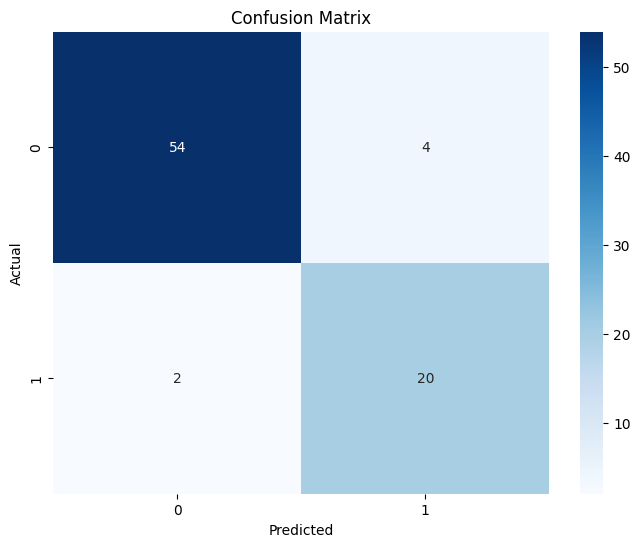

In [10]:
# Plot the confusion matrix heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rdmf.classes_, yticklabels=rdmf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

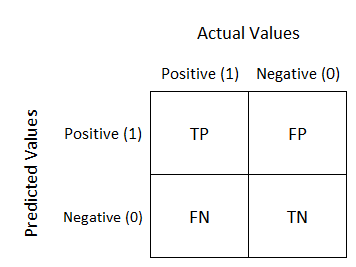

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



In [12]:
y_test_series = pd.Series(y_test, name='Actual')
y_pred_series = pd.Series(y_pred, name='Predicted')
results = pd.DataFrame({'Actual': y_test_series, 'Predicted': y_pred_series})
results['Correct'] = results['Actual'] == results['Predicted']

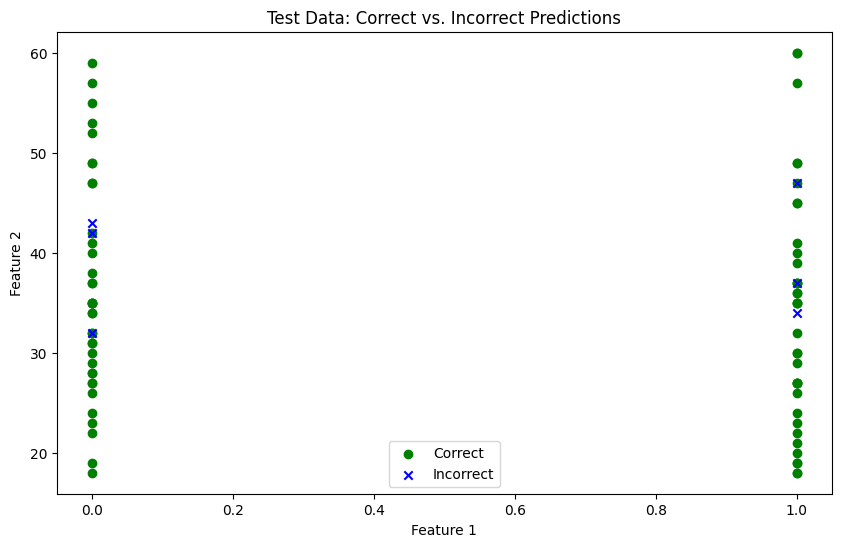

In [13]:
#Green Points: Represent data points where the model's prediction matches the actual label (correct predictions).
#Blue Points: Represent data points where the model's prediction does not match the actual label (incorrect predictions).
X_test_df = pd.DataFrame(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_df[results['Correct']].iloc[:, 0], X_test_df[results['Correct']].iloc[:, 1], c='Green', marker='o', label='Correct')
plt.scatter(X_test_df[~results['Correct']].iloc[:, 0], X_test_df[~results['Correct']].iloc[:, 1], c='Blue', marker='x', label='Incorrect')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Test Data: Correct vs. Incorrect Predictions')
plt.show()